In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd 
from pandas import read_csv
import pandas as pd
import colorsys

In [3]:
#Reading the files
gdf = gpd.read_file('../data/UScounties/UScounties.shp')
gdf = gdf[gdf["STATE_NAME"] == "Florida"]

file_name = '../data/population.csv'
names = ['County','Population']
df = read_csv(file_name,names = names)

In [4]:
def hls_to_rgb(h, l, s,new_lightness):
    # Normalize HLS values to [0, 1]
    h = h / 360
    l = l / 100
    s = s / 100

    # Convert HLS to RGB using colorsys
    rgb = colorsys.hls_to_rgb(h, l * new_lightness, s)

    # Return RGB values as a tuple
    return tuple(i for i in rgb)

def rgb_to_hls(r, g, b):
    # Normalize RGB values to [0, 1]
    r, g, b = r / 255.0, g / 255.0, b / 255.0

    # Convert RGB to HLS using matplotlib
    h, l, s = colorsys.rgb_to_hls(r, g, b)

    # Return HLS values as a tuple
    return (h * 360, l * 100, s * 100)  

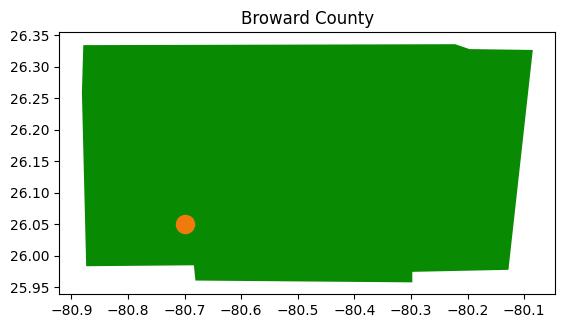

In [5]:

name = "Broward"
county = gdf[gdf["NAME"] == name]
county.plot(color='#098a03')
plt.title("%s County" % name)
    
size=13
plt.plot(-80.7, 26.05, marker="o", markersize=size, markeredgecolor="#f07a0b", markerfacecolor="#f07a0b")
plt.show()

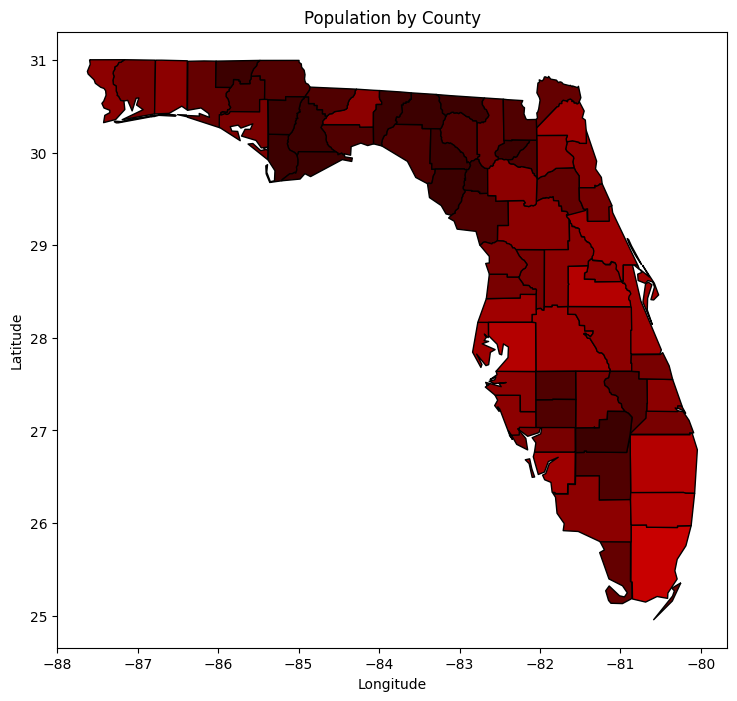

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the DataFrame
for index, row in df.iterrows():
    county = row['County']
    population = row['Population']
    
    # Filter the GeoDataFrame for the current county
    c = gdf[gdf["NAME"] == county]
    
    # Define the color based on population
    color = 'r' 
    h, l, s = rgb_to_hls(*mcolors.to_rgb(color))
    
    if(0 < population < 5000):
        new_lightness = 50
    elif (5000 < population < 20000):
        new_lightness = 60
    elif (20000 < population < 50000):
        new_lightness = 80
    elif( 50000 < population < 100000):
        new_lightness = 100
    elif(100000 < population < 200000):
        new_lightness = 120
    elif(200000 < population < 500000):
        new_lightness = 140
    elif(500000 < population < 1000000):
        new_lightness = 160
    elif(1000000 < population < 2000000):
        new_lightness = 180
    else:
        new_lightness = 200
    new_color = hls_to_rgb(h, l, s, new_lightness)
    
    # Plot the county with the new color
    c.plot(ax=ax, color=new_color, edgecolor='black')  # Use the same axis for all plots

# Set the title and show the plot
plt.title("Population by County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


C:\Users\chuya\OneDrive\Documents\Projects\GatorAIHackathon\GatorAIHackathon\env\Lib\site-packages\geopandas\plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


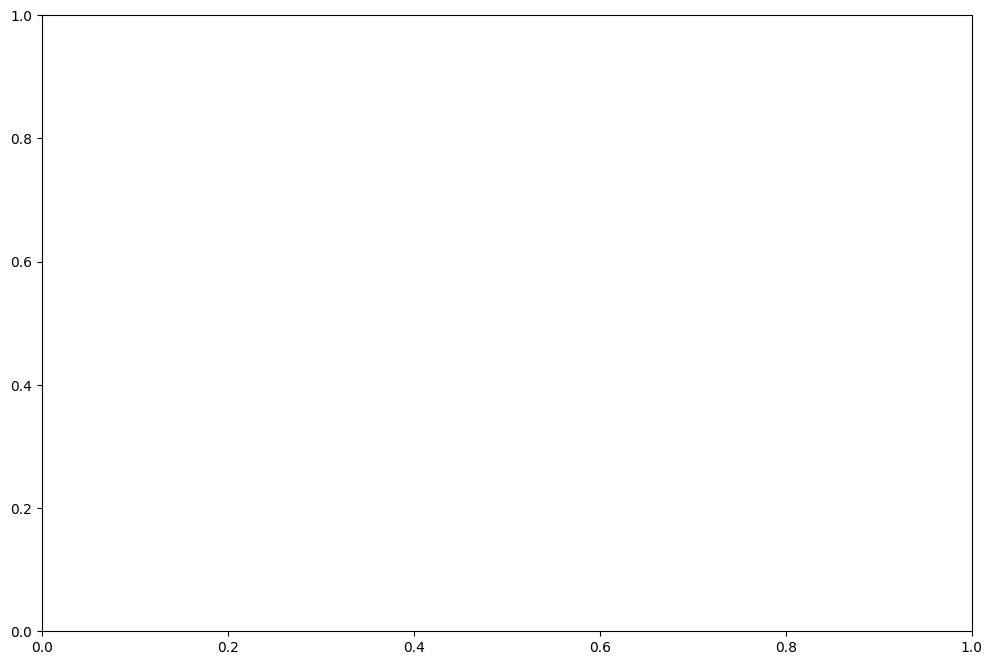

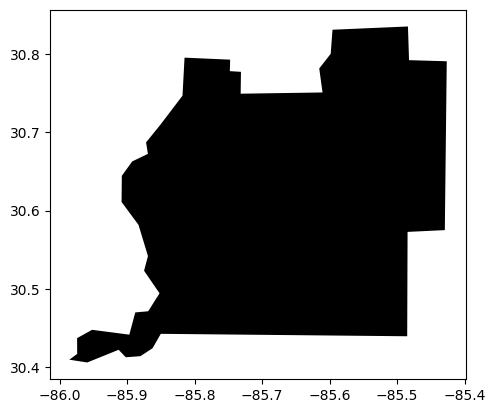

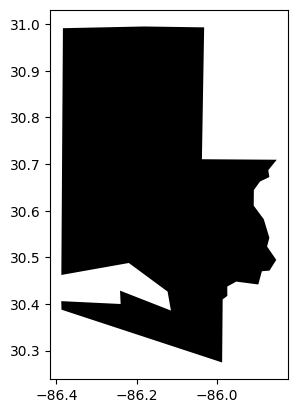

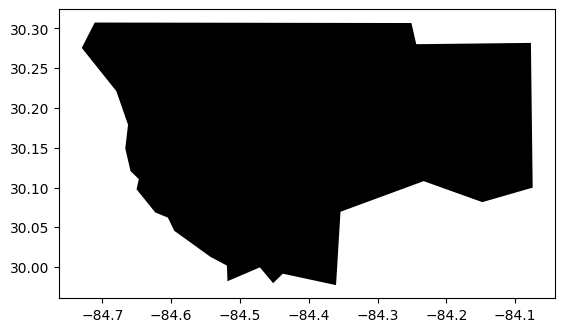

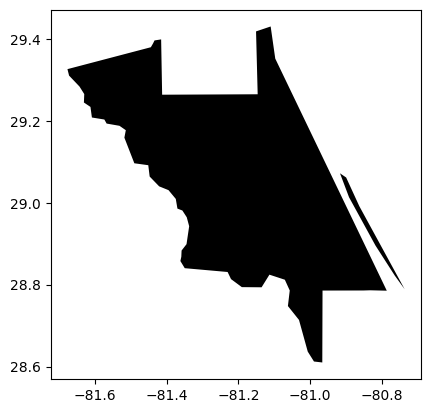

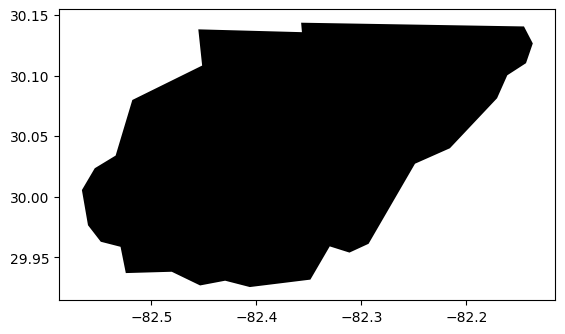

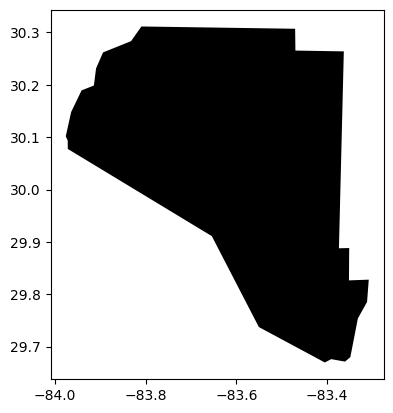

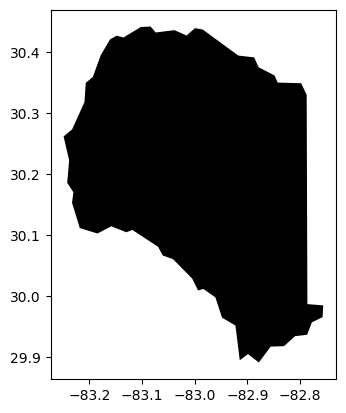

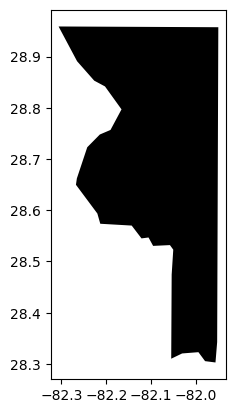

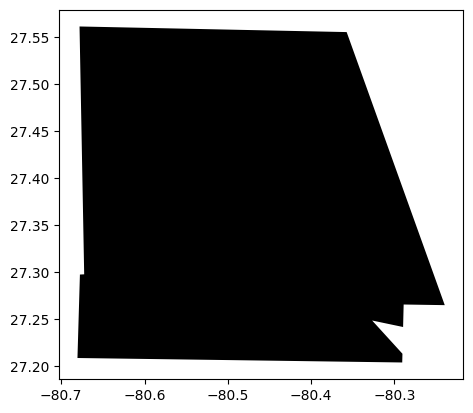

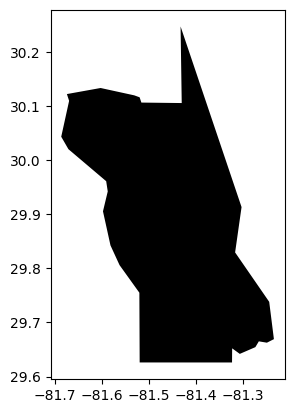

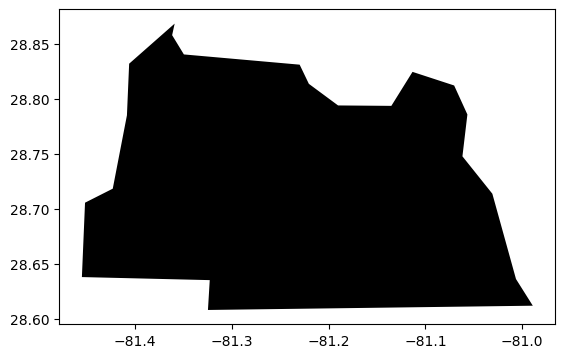

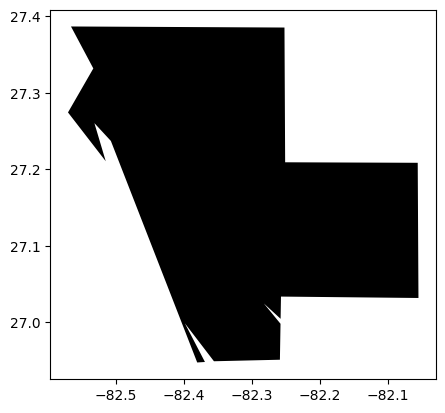

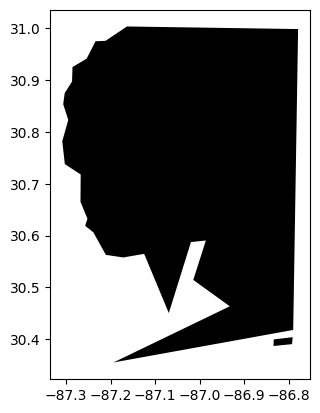

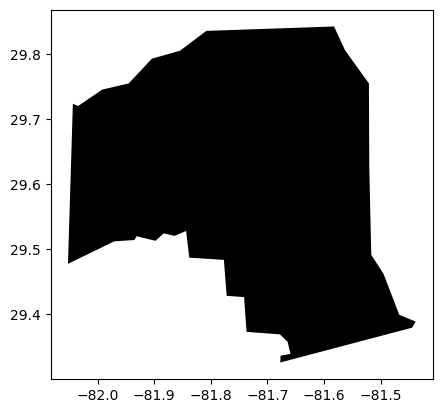

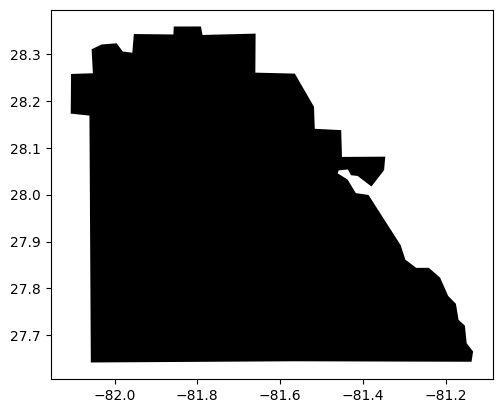

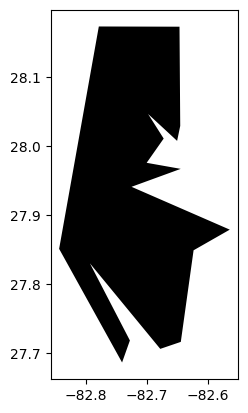

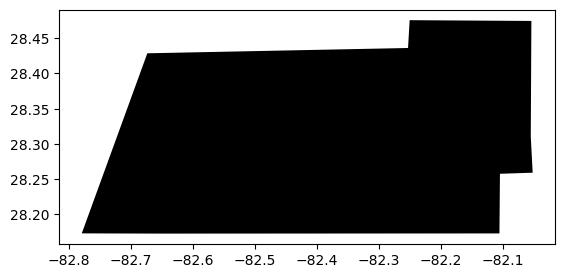

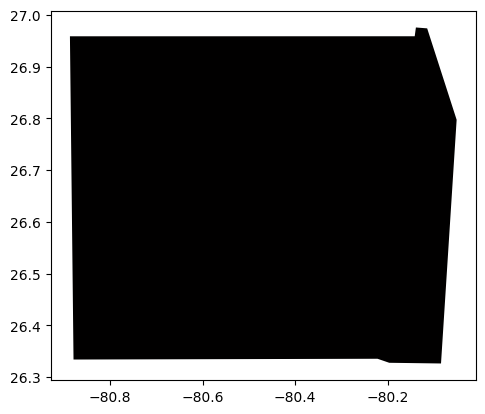

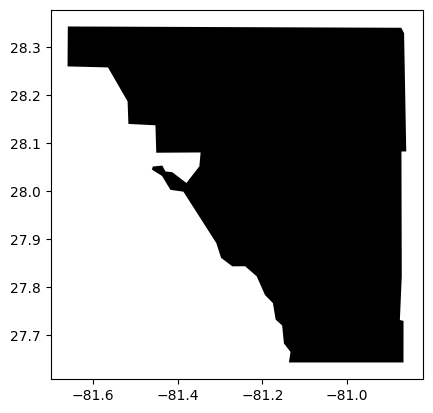

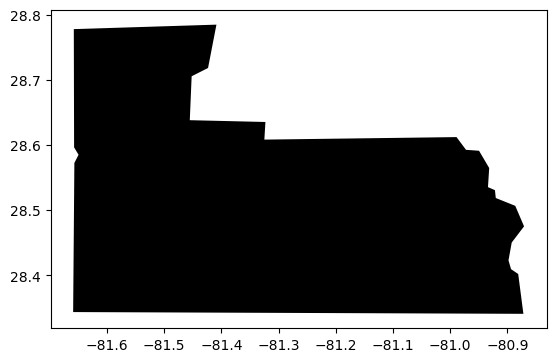

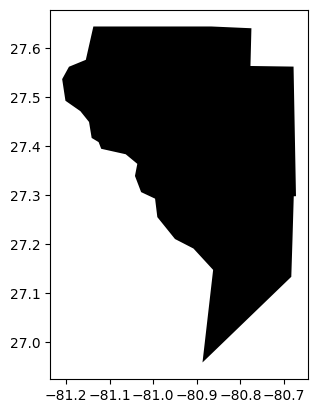

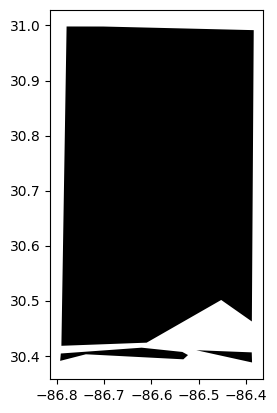

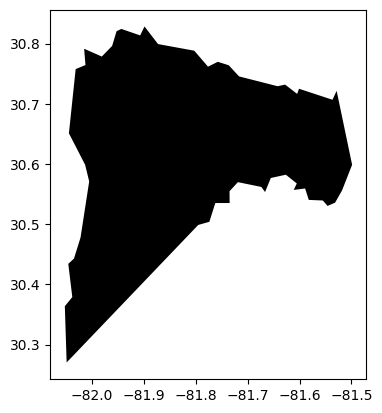

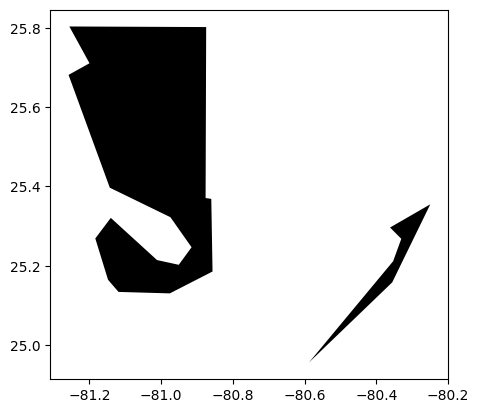

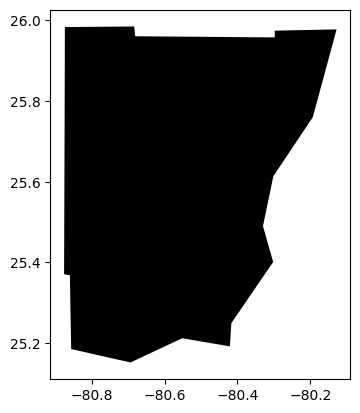

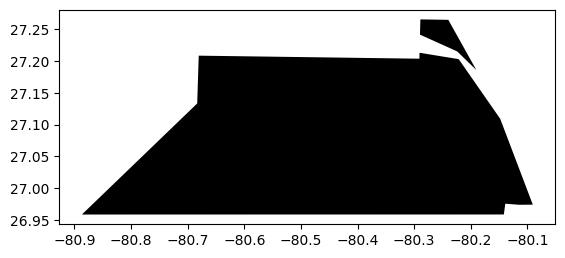

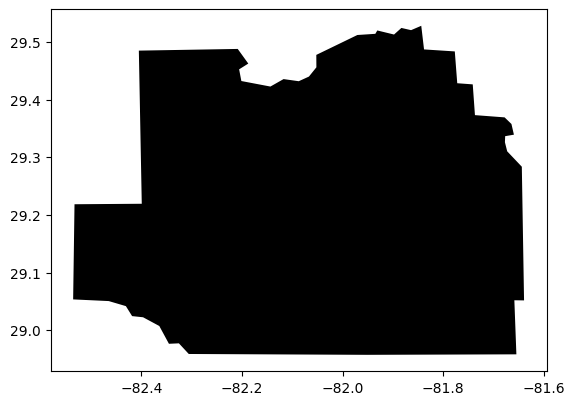

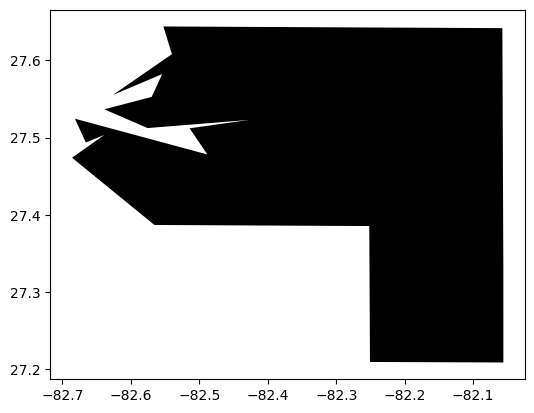

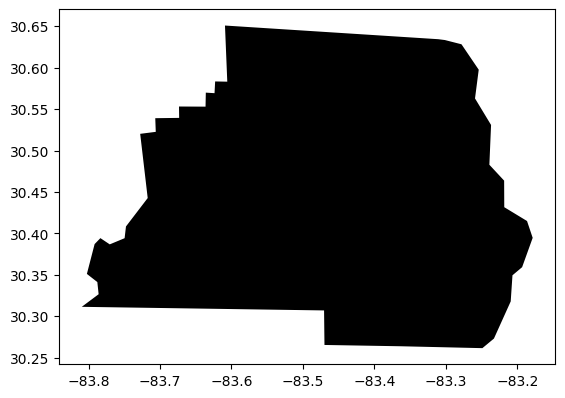

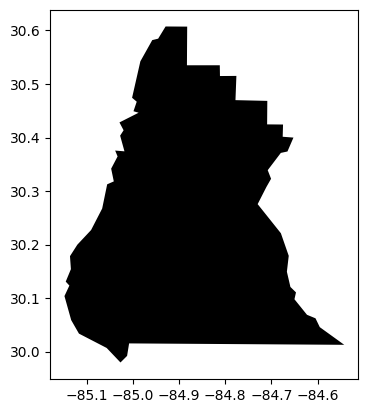

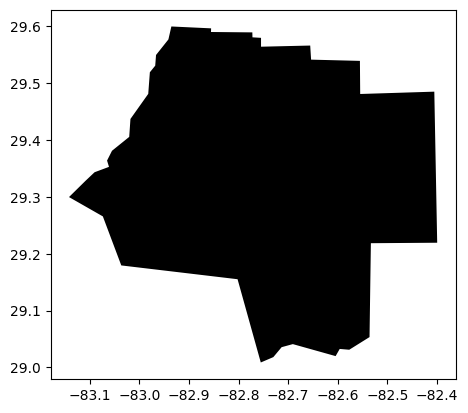

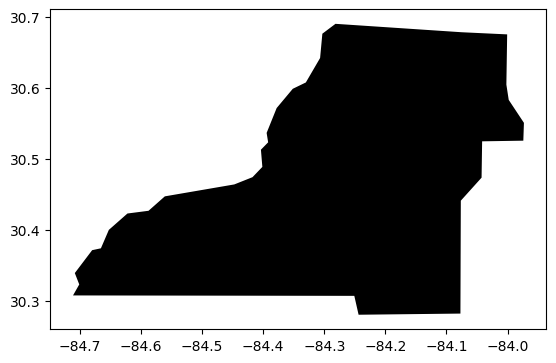

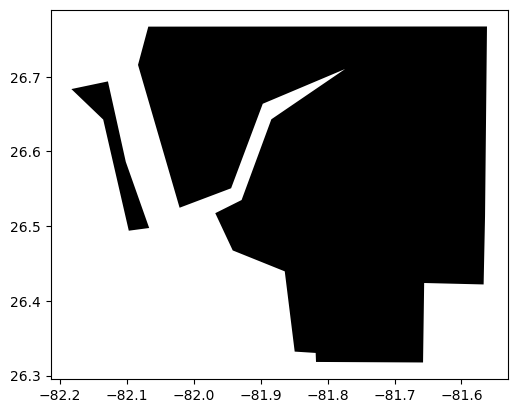

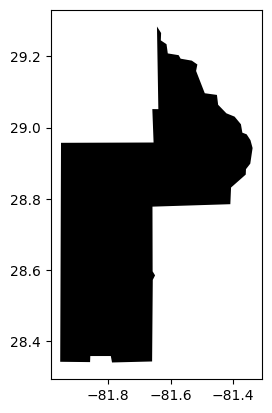

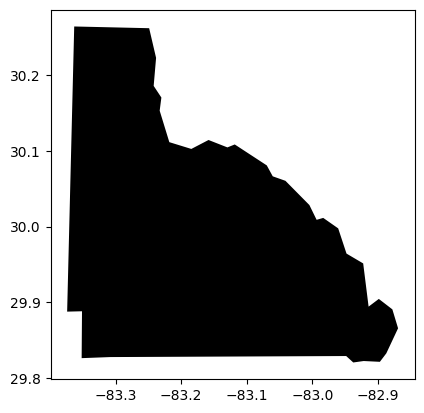

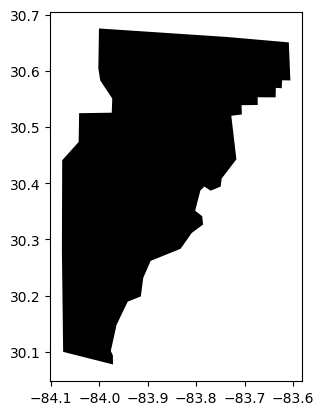

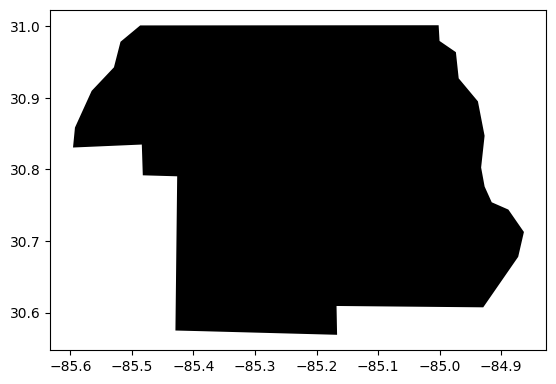

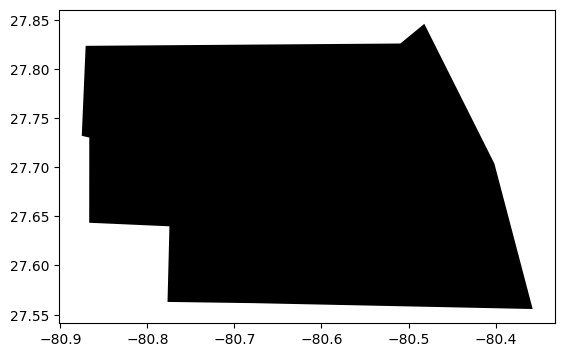

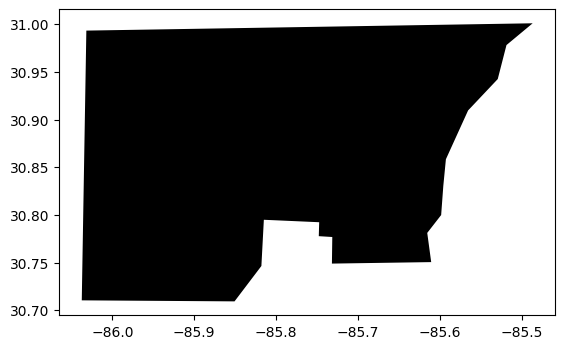

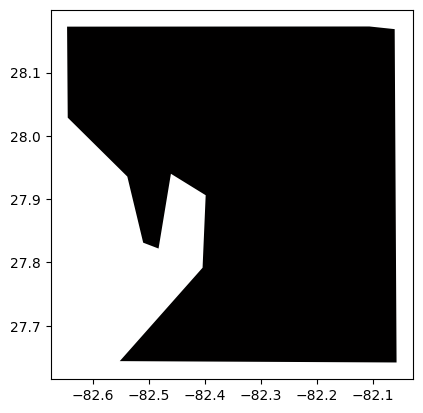

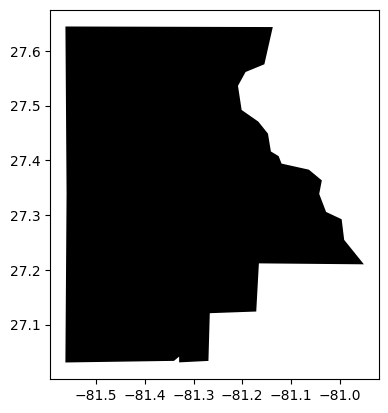

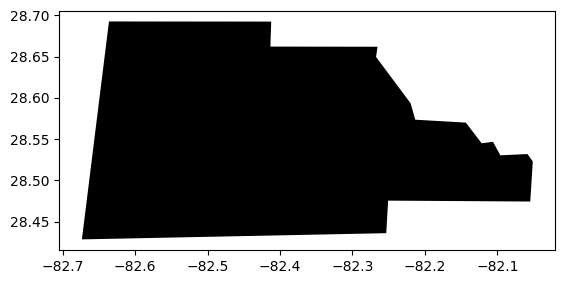

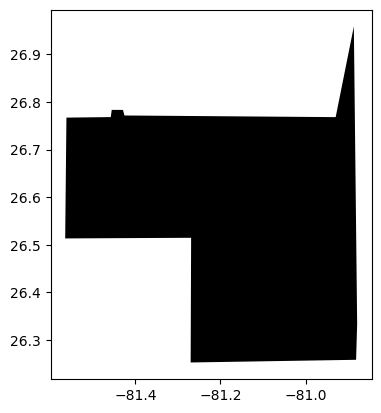

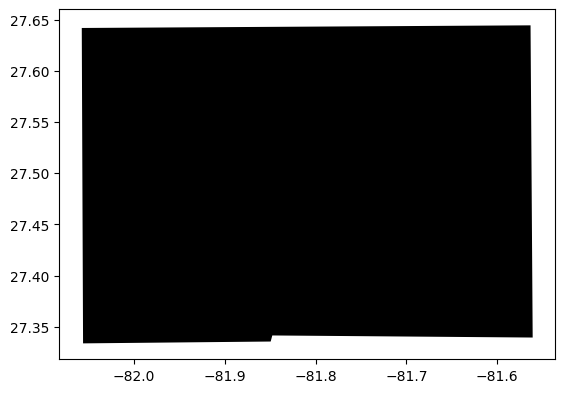

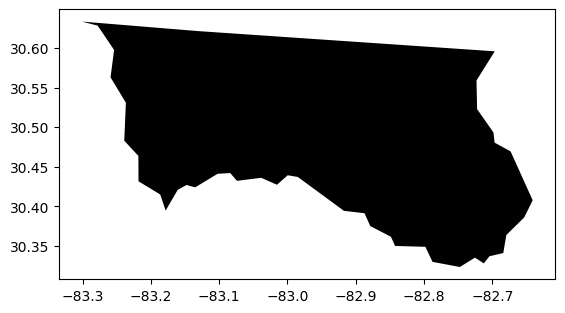

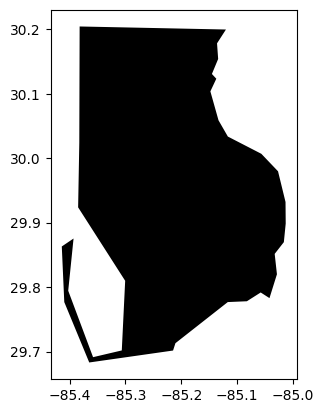

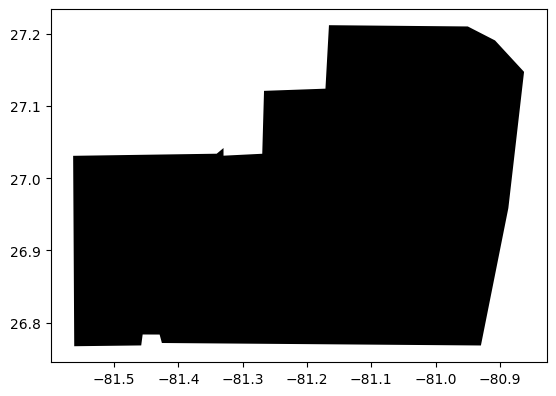

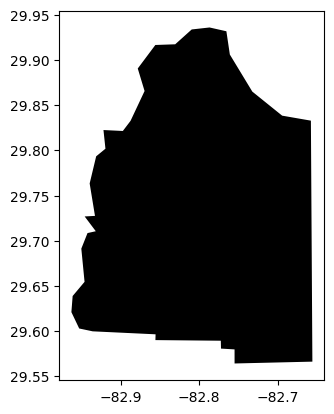

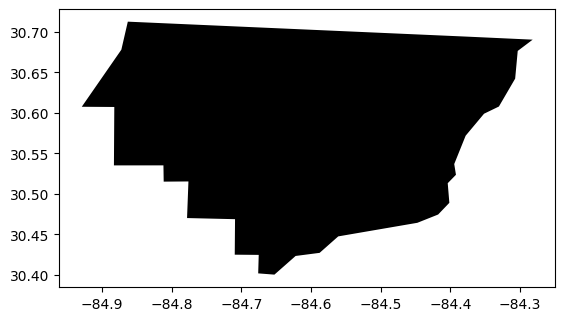

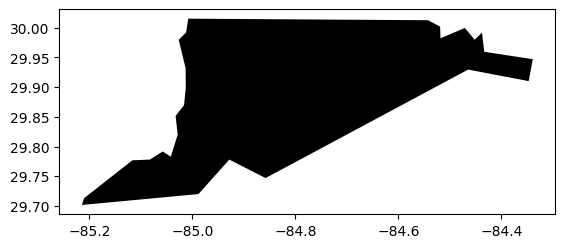

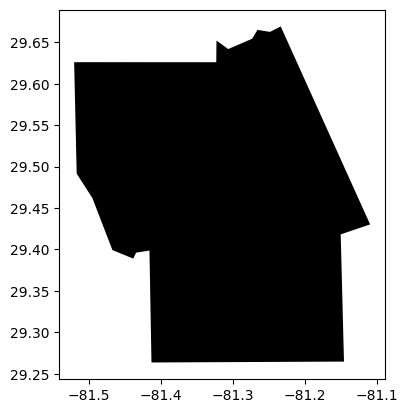

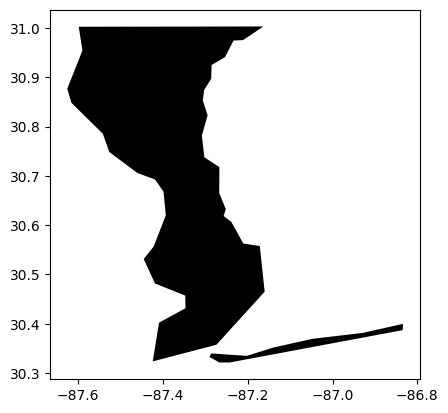

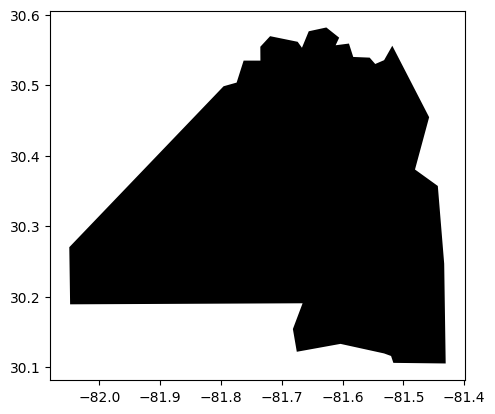

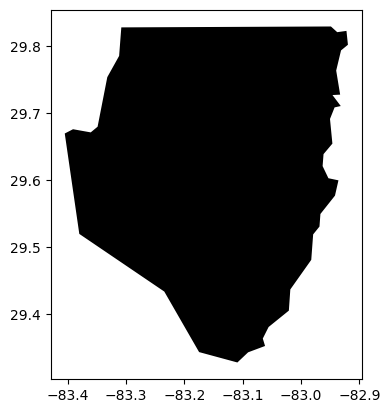

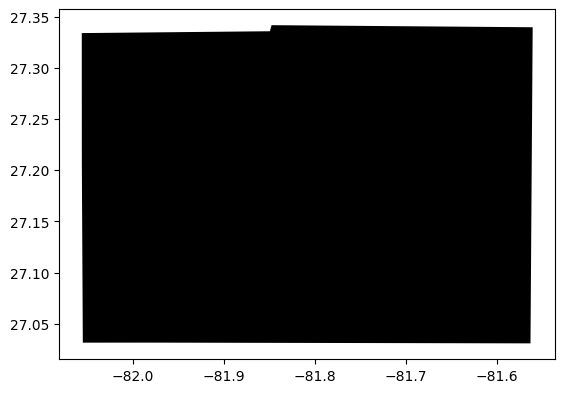

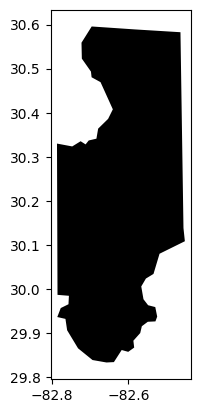

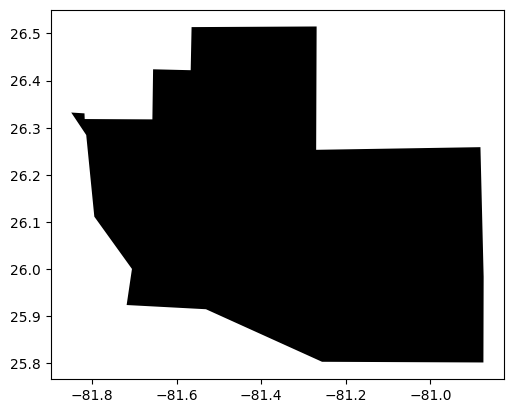

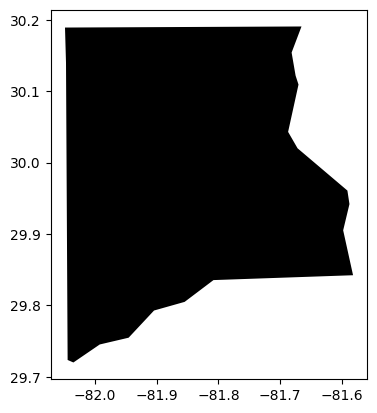

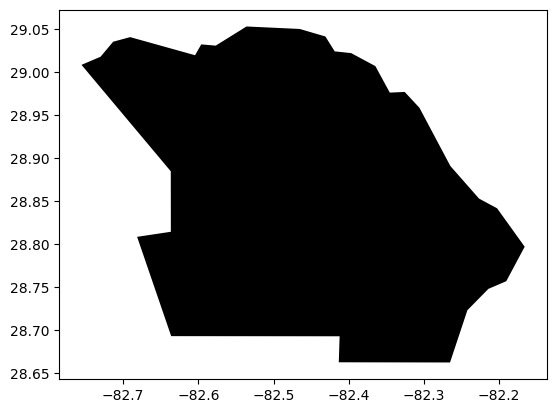

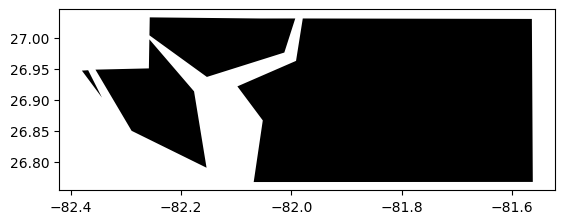

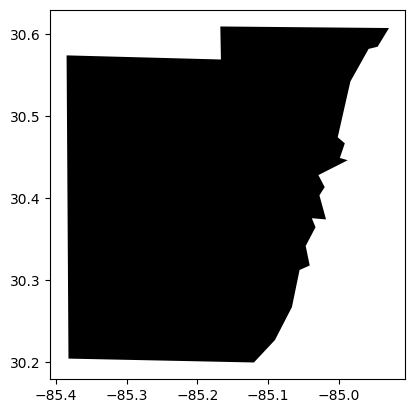

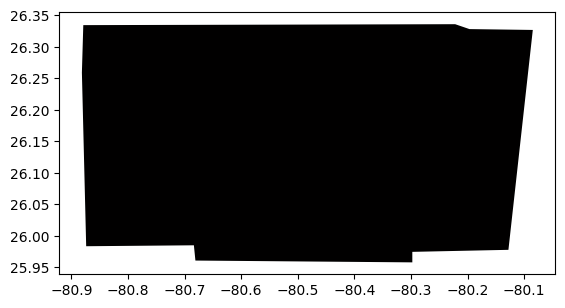

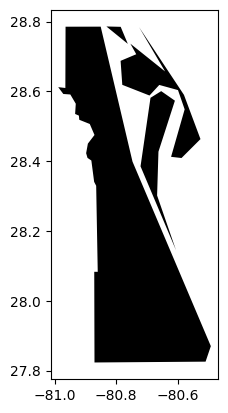

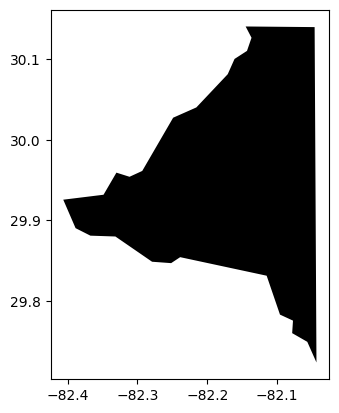

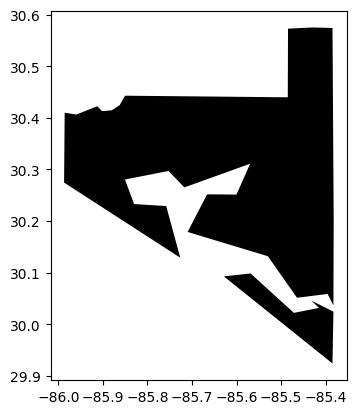

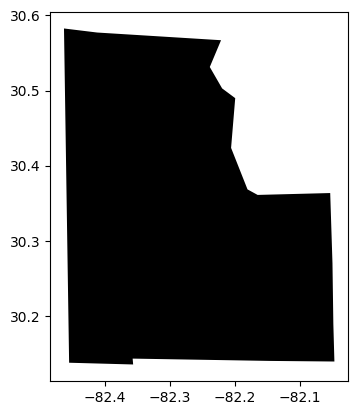

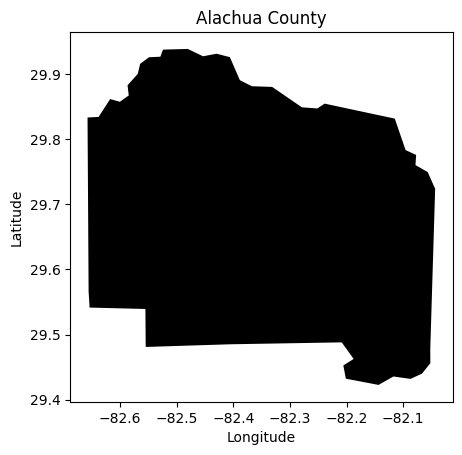

In [10]:
#Loop through the dataframe
fig, ax = plt.subplots(figsize=(12,8))
for index, row in df.iterrows():
    county = row['County']
    population = row['Population']
    
    c = gdf[gdf["NAME"] == county]
    
    color='r' 
    h,l,s = rgb_to_hls(*mcolors.to_rgb(color))
    new_lightness = population / 2000000
    new_color = hls_to_rgb(h, l, s, new_lightness)
    
    c.plot(color= new_color)

plt.title("%s County" % county)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()